In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Reading the CSV file
df = pd.read_csv("/content/drive/MyDrive/Tutorial/Machine Learning/Titanic/titanic_dataset.csv")

In [59]:
# Print the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# Shape of the dataset
df.shape

(891, 12)

In [62]:
# Checking for data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

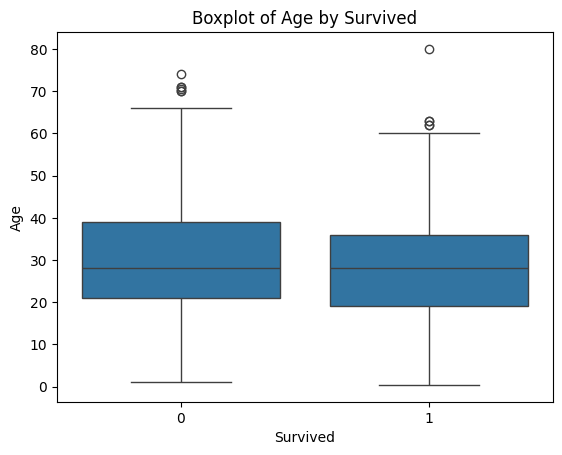

In [63]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot of Age by Survived')
plt.show()

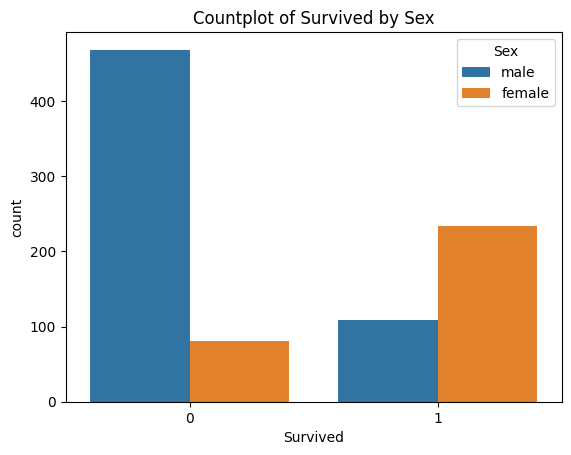

In [64]:
# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Countplot of Survived by Sex')
plt.show()

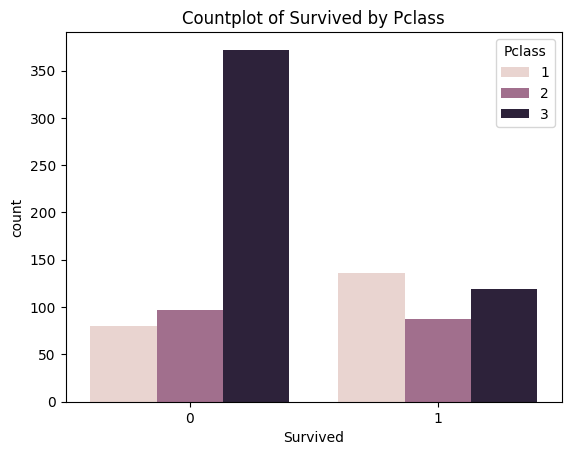

In [65]:
# Countplot of Survived by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Countplot of Survived by Pclass')
plt.show()

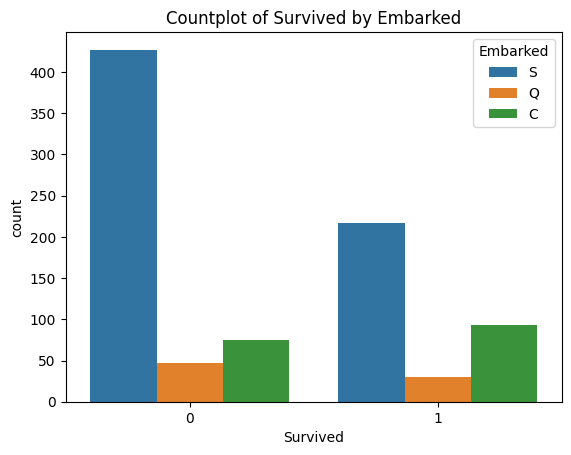

In [66]:
# Countplot of Survived by Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Countplot of Survived by Embarked')
plt.show()

# Missing Values

In [67]:
#missing values in the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dealing with Misssing values for Continuous variables

In [68]:
df['Age'].isnull().sum()

177

In [69]:
# Import the KNNImputer class:
from sklearn.impute import KNNImputer

In [70]:
# Numerical Values computation of the missing values with the K-nearest neighbour
imputer = KNNImputer(n_neighbors=5)

for col in ['Age']:
    imputed_values = imputer.fit_transform(df[[col]])
    df[col] = imputed_values

In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
mode_val = df['Embarked'].mode()
mode_val

0    S
Name: Embarked, dtype: object

In [74]:
df['Embarked'] = df['Embarked'].fillna(value = mode_val)

In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dealing with Categorical Variables

In [76]:
#Categorical variables in the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [78]:
#number of unique values
df[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## One-hot Encoding

In [79]:
pd.get_dummies(df['Embarked']).astype(int).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [80]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [81]:
# Assuming 'df' is your DataFrame
df['Pclass'] = df['Pclass'].astype(str)
df['SibSp'] = df['SibSp'].astype(str)
df['Parch'] = df['Parch'].astype(str)

In [82]:
pd.get_dummies(df['Pclass']).astype(int).head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [83]:
df = df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [84]:
df = pd.get_dummies(df).astype(int)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22,7,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38,71,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26,7,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35,53,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35,8,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [85]:
#shape of the data
df.shape

(891, 25)

In [86]:
#checking missing values in the data
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [87]:
from scipy.stats import ttest_ind

In [88]:
# Separate the data into two groups based on survival
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

# Perform the t-test
t_statistic, p_value = ttest_ind(survived, not_survived)

# Define significance level
alpha = 0.05

# Interpret the outcomes
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age between passengers who survived and those who did not survive.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age between passengers who survived and those who did not survive.")

T-statistic: -2.026468829262133
P-value: 0.04301487558220878
Reject the null hypothesis. There is a significant difference in the mean age between passengers who survived and those who did not survive.


In [89]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [90]:
# To build any Model using sklearn we have to specify Dependent and Independent Variables
#seperating independent and dependent variables
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.20)

In [92]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

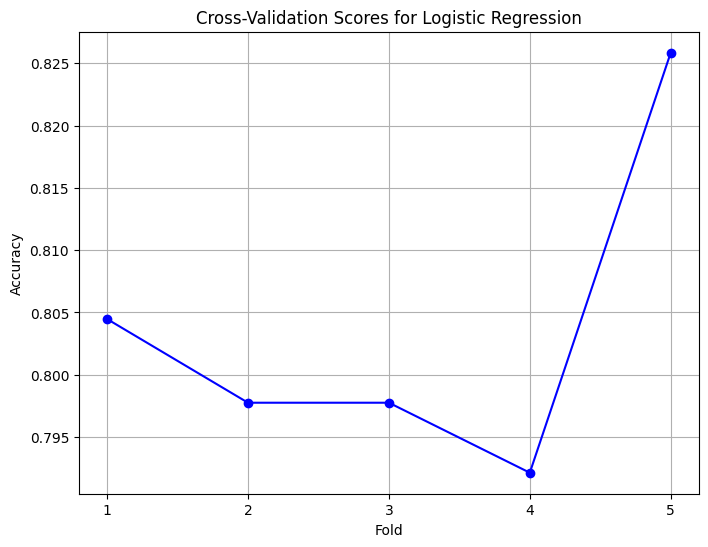

In [93]:
import matplotlib.pyplot as plt

# Plotting cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), logistic_cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [94]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)

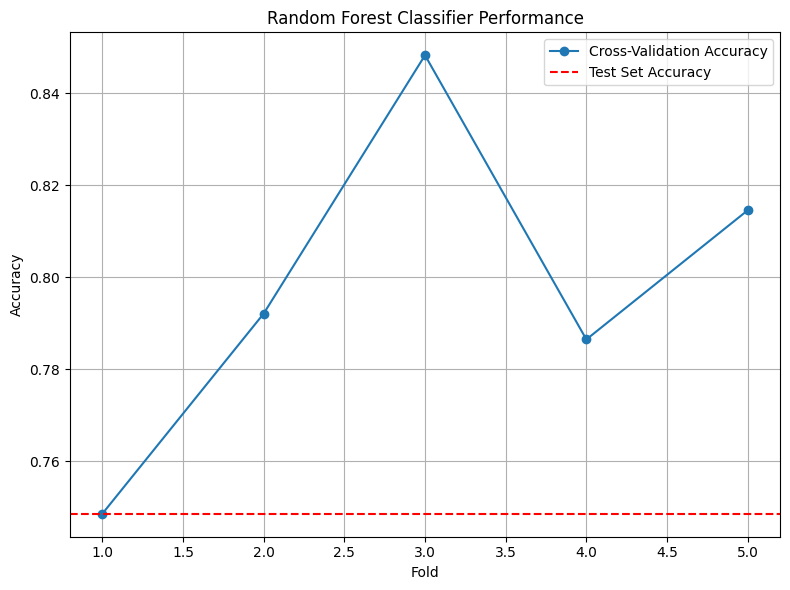

In [95]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot cross-validation scores
plt.plot(range(1, 6), rf_cv_scores, marker='o', label='Cross-Validation Accuracy')

# Plot overall accuracy on test set
plt.axhline(y=rf_accuracy, color='r', linestyle='--', label='Test Set Accuracy')

plt.title('Random Forest Classifier Performance')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

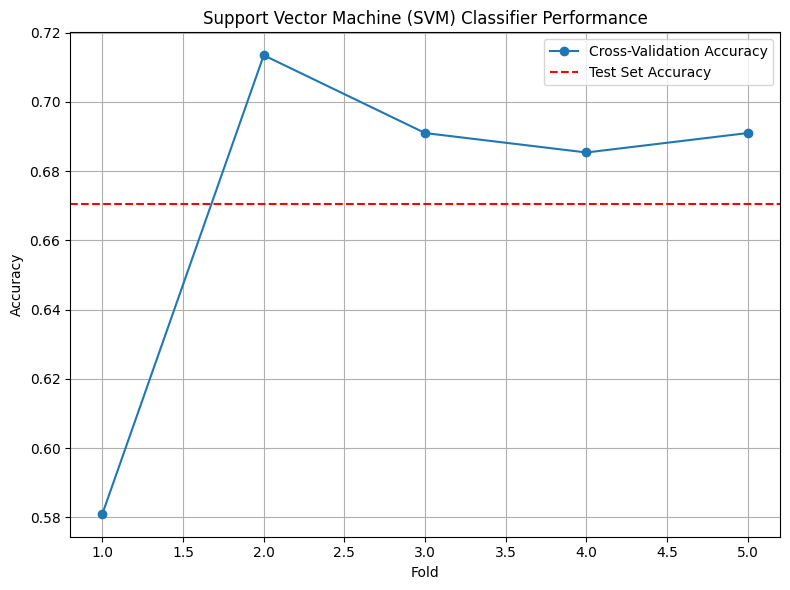

In [97]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot cross-validation scores
plt.plot(range(1, 6), svm_cv_scores, marker='o', label='Cross-Validation Accuracy')

# Plot overall accuracy on test set
plt.axhline(y=svm_accuracy, color='r', linestyle='--', label='Test Set Accuracy')

plt.title('Support Vector Machine (SVM) Classifier Performance')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# Print accuracy and cross-validation scores for each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Cross-Validation Scores:", svm_cv_scores)

Logistic Regression Accuracy: 0.7597765363128491
Logistic Regression Cross-Validation Scores: [0.80446927 0.79775281 0.79775281 0.79213483 0.8258427 ]
Random Forest Accuracy: 0.7486033519553073
Random Forest Cross-Validation Scores: [0.74860335 0.79213483 0.84831461 0.78651685 0.81460674]
Support Vector Machine Accuracy: 0.6703910614525139
Support Vector Machine Cross-Validation Scores: [0.58100559 0.71348315 0.69101124 0.68539326 0.69101124]


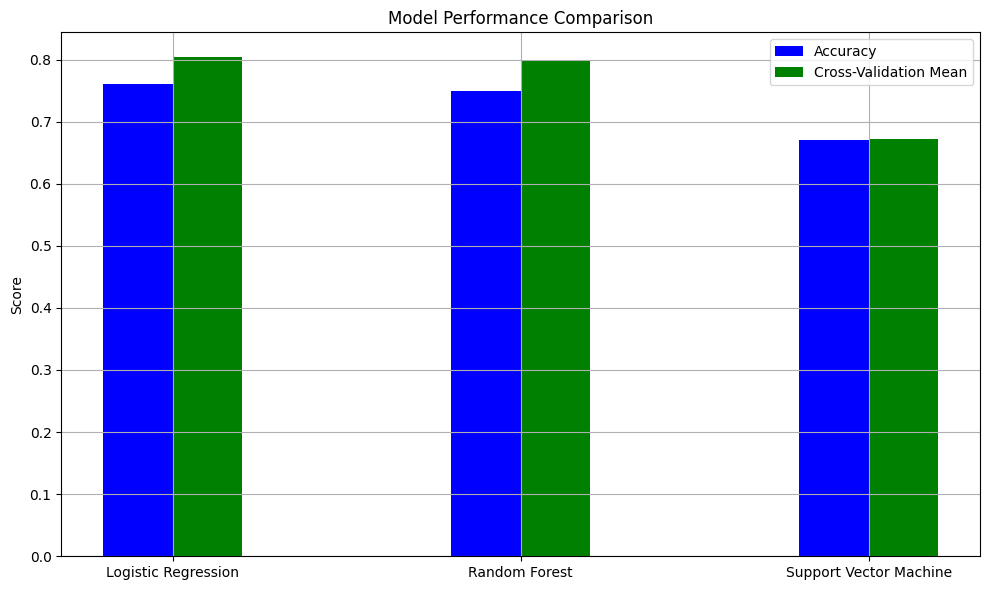

In [99]:
import numpy as np
# Combine accuracy and cross-validation scores for plotting
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracies = [logistic_accuracy, rf_accuracy, svm_accuracy]
cv_scores = [logistic_cv_scores, rf_cv_scores, svm_cv_scores]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy for each model
plt.bar(np.arange(len(models)) - 0.1, accuracies, width=0.2, label='Accuracy', color='b')

# Plot mean cross-validation scores for each model
plt.bar(np.arange(len(models)) + 0.1, [np.mean(scores) for scores in cv_scores], width=0.2, label='Cross-Validation Mean', color='g')

plt.xticks(range(len(models)), models)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [101]:
# Select the variables for clustering (Age and Fare)
X_clustering = df[['Age', 'Fare']]# Determine the optimal number of clusters using the Elbow method
inertia = []

In [102]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

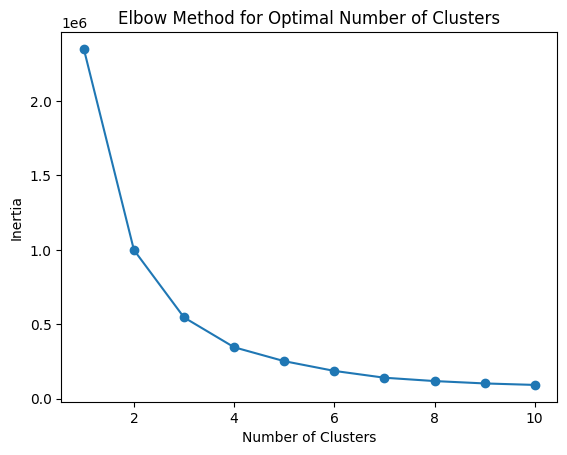

In [103]:
# Plot the Elbow method to visualize the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [104]:
# Based on the Elbow method, choose the optimal number of clusters
k = 6
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

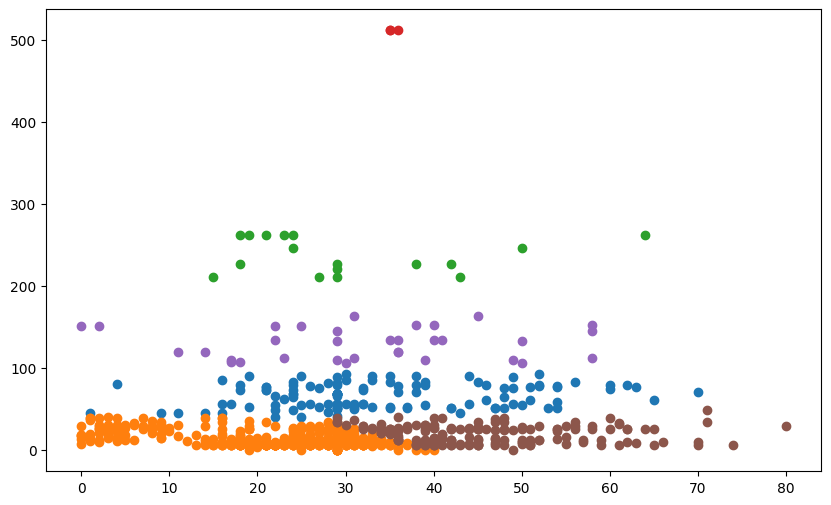

In [105]:
# Assign clusters to each data point
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = X_clustering[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Fare'], label=f'Cluster {cluster+1}')

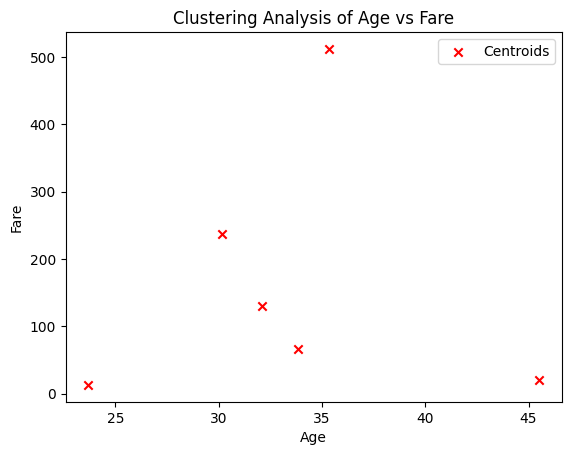

In [106]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clustering Analysis of Age vs Fare')
plt.legend()
plt.show()

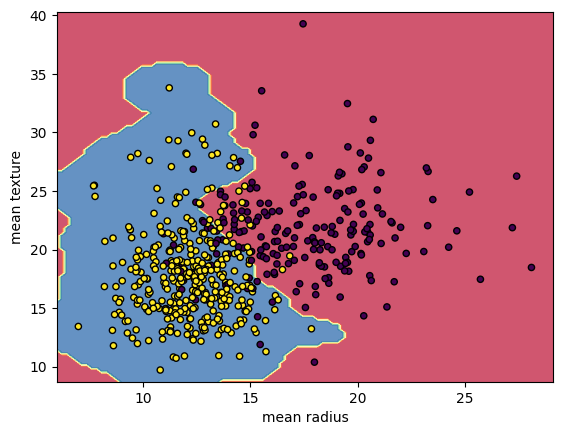

In [108]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()
